## Observations and Insights 

1. Capomulin and Ramicane were the most successful drugs in reducing tumor sizes.

2. A positive correlation of 0.84, suggests a strong relationship between tumor volume and weight within the targeted mice. Our linear regression model indicates that as weight increases, so does the average tumor volume. (see linear regression scatter plot)

3. Capomulin treatment for mouse G316 suggested that the tumor volume increased and peaked by about 30% at approximately halfway through the treatment and then shrunk by approximately 70% by the end of the treatment period. (see line plot "Capomulin treatment of mouse G316). 


In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)
#mouse_metadata
#study_results

# Combine the data into a single dataset
merged_file_df = pd.merge(mouse_metadata, study_results, on= "Mouse ID", how= "outer")
merged_file_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice in the DataFrame.
merged_file_df.count()

Mouse ID              1893
Drug Regimen          1893
Sex                   1893
Age_months            1893
Weight (g)            1893
Timepoint             1893
Tumor Volume (mm3)    1893
Metastatic Sites      1893
dtype: int64

In [3]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

dupes = merged_file_df.duplicated(subset = ["Mouse ID", "Timepoint"], keep = 'first') 
duplicates = merged_file_df.loc[dupes == True]
duplicates

# Optional: Get all the data for the duplicate mouse ID. 


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [4]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

#merged_file_df.count()
clean_file_df = pd.DataFrame(merged_file_df.drop_duplicates(subset = ["Mouse ID", "Timepoint"], keep = 'first', inplace = True)) 
#merged_file_df                     

In [5]:
# Checking the number of mice in the clean DataFrame.
#merged_file_df.sort_values("Mouse ID", ascending=True, inplace = True) 
merged_file_df.count()

Mouse ID              1888
Drug Regimen          1888
Sex                   1888
Age_months            1888
Weight (g)            1888
Timepoint             1888
Tumor Volume (mm3)    1888
Metastatic Sites      1888
dtype: int64

## Summary Statistics

In [6]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
mean       = merged_file_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].mean()
median     = merged_file_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].median()
variance   = merged_file_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].var()
stdv       = merged_file_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].std()
sem        = merged_file_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].sem()
summary_df = pd.DataFrame({"Mean": mean, "Median": median, "Variance": variance, "Standard Deviation": stdv, 
                          "SEM": sem})
summary_df


# This method is the most straighforward, creating multiple series and putting them all together at the end.

,Mean,Median,Variance,Standard Deviation,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.393463,50.909965,43.138803,6.568014,0.525862
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar Plots

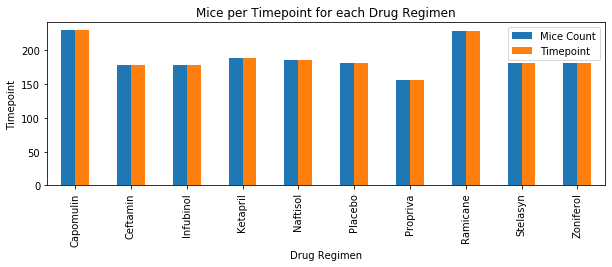

<Figure size 432x288 with 0 Axes>

In [7]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pandas. 

grouped_df = pd.DataFrame(merged_file_df.groupby(["Drug Regimen"]).count()).reset_index()

# Filter the DataFrame down only to those columns to chart
regimen_data = grouped_df[["Drug Regimen","Mouse ID", "Timepoint"]]
regimen_data = regimen_data.rename(columns={"Mouse ID": "Mice Count"})

# Set the index to be "Drug Regimen" so they will be used as labels
regimen_data = regimen_data.set_index("Drug Regimen")

# Use DataFrame.plot() in order to create a bar chart of the data
regimen_data.plot(kind="bar", figsize=(10,3))

# Set a title for the chart
plt.title("Mice per Timepoint for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")

plt.show()
plt.tight_layout()

Text(0, 0.5, 'Timepoint')

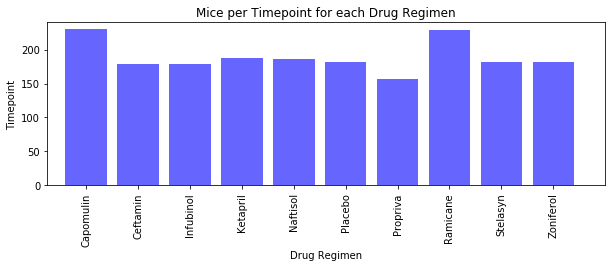

In [8]:
# Generate a bar plot showing the number of mice per time point for each treatment throughout the course of the study using pyplot.

x_axis = np.arange(len(grouped_df))
tick_locations = [value for value in x_axis]
plt.figure(figsize=(10,3))
plt.bar(x_axis, grouped_df["Timepoint"], color='b', alpha=0.6, align="center")
plt.xticks(tick_locations, grouped_df["Drug Regimen"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(grouped_df["Timepoint"])+10)

# Set a Title and labels
plt.title("Mice per Timepoint for each Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("Timepoint")

## Pie Plots

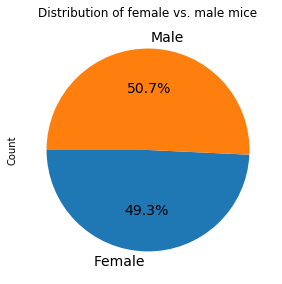

In [9]:
# Generate a pie plot showing the distribution of female versus male mice using pandas
gender_df = pd.DataFrame(merged_file_df.groupby(["Sex"]).count()).reset_index()
gender_df = gender_df[["Sex","Mouse ID"]]
gender_df = gender_df.rename(columns={"Mouse ID": "Count"})
gender_df.head()

# plot chart
plt.figure(figsize=(10,6))
ax1 = plt.subplot(121, aspect='equal')
gender_df.plot(kind='pie', 
               ax=ax1, 
               autopct='%1.1f%%', 
               y = "Count", 
               title = ("Distribution of female vs. male mice"),
               startangle=180, 
               shadow=False, 
               labels=gender_df['Sex'], 
               legend = False, fontsize=14)

 


([<matplotlib.patches.Wedge at 0x1e9ab149b08>,
 [Text(-0.02562299800632484, -1.099701533132135, 'Female'),
  Text(0.025623100967813093, 1.099701530733132, 'Male')],
 [Text(-0.013976180730722638, -0.5998371998902553, '49.3%'),
  Text(0.013976236891534414, 0.5998371985817083, '50.7%')])

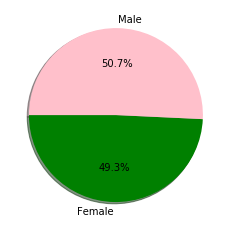

In [10]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
gender_counts = (merged_file_df.groupby(["Sex"])["Age_months"].count()).tolist()

# Labels for the sections of our pie chart
labels = ["Female", "Male"]

# The colors of each section of the pie chart
colors = ["green", "pink"]

plt.pie(gender_counts, labels=labels, colors=colors, 
        autopct="%1.1f%%", shadow=True, startangle=180)

## Quartiles, Outliers and Boxplots

In [11]:
# Calculate the final tumor volume of each mouse across four of the most promising treatment regimens. 

# Set up individual treatment dataframes...
capo_df = merged_file_df.loc[merged_file_df["Drug Regimen"] == "Capomulin",:]
rami_df = merged_file_df.loc[merged_file_df["Drug Regimen"] == "Ramicane", :]
infu_df = merged_file_df.loc[merged_file_df["Drug Regimen"] == "Infubinol", :]
ceft_df = merged_file_df.loc[merged_file_df["Drug Regimen"] == "Ceftamin", :]

# This section will calculate the final tumor volume for all mice across the 4 treatments
capo = capo_df.groupby('Mouse ID').max()['Timepoint']
capovol = pd.DataFrame(capo)
capomerge = pd.merge(capovol, merged_file_df, on=("Mouse ID","Timepoint"),how="left")
print (f"{capomerge.head(5)}")

rami = rami_df.groupby('Mouse ID').max()['Timepoint']
ramivol = pd.DataFrame(rami)
ramimerge = pd.merge(ramivol, merged_file_df, on=("Mouse ID","Timepoint"),how="left")
#print (f"{ramimerge.head(5)}")

infu = infu_df.groupby('Mouse ID').max()['Timepoint']
infuvol = pd.DataFrame(infu)
infumerge = pd.merge(infuvol, merged_file_df, on=("Mouse ID","Timepoint"),how="left")
#print (f"{infumerge.head(5)}")

ceft = ceft_df.groupby('Mouse ID').max()['Timepoint']
ceftvol = pd.DataFrame(ceft)
ceftmerge = pd.merge(ceftvol, merged_file_df, on=("Mouse ID","Timepoint"),how="left")
#print (f"{ceftmerge.head(5)}")

  Mouse ID  Timepoint Drug Regimen     Sex  Age_months  Weight (g)  \
0     b128         45    Capomulin  Female           9          22   
1     b742         45    Capomulin    Male           7          21   
2     f966         20    Capomulin    Male          16          17   
3     g288         45    Capomulin    Male           3          19   
4     g316         45    Capomulin  Female          22          22   

   Tumor Volume (mm3)  Metastatic Sites  
0           38.982878                 2  
1           38.939633                 0  
2           30.485985                 0  
3           37.074024                 1  
4           40.159220                 2  


In [19]:
# Calculate the IQR and quantitatively determine if there are any potential outliers. 
ctumors = capomerge["Tumor Volume (mm3)"]
cquartiles = ctumors.quantile([.25,.5,.75])
clowerq = cquartiles[0.25]
cupperq = cquartiles[0.75]
ciqr = cupperq-clowerq
clower_bound = clowerq - (1.5*ciqr)
cupper_bound = cupperq + (1.5*ciqr)
print(f"The Interquartile Range (IQR) for Capomulin is: {ciqr}")
print(f"Capomulin potential outliers could be values below {clower_bound} and above {cupper_bound}.")
print(f" ")

rtumors = ramimerge["Tumor Volume (mm3)"]
rquartiles = rtumors.quantile([.25,.5,.75])
rlowerq = rquartiles[0.25]
rupperq = rquartiles[0.75]
riqr = rupperq-rlowerq
rlower_bound = rlowerq - (1.5*riqr)
rupper_bound = rupperq + (1.5*riqr)
print(f"The Interquartile Range (IQR) for Ramicane is: {riqr}")
print(f"Ramicane potential outliers could be values below {rlower_bound} and above {rupper_bound}.")
print(f" ")

itumors = infumerge["Tumor Volume (mm3)"]
iquartiles = itumors.quantile([.25,.5,.75])
ilowerq = iquartiles[0.25]
iupperq = iquartiles[0.75]
iiqr = iupperq-ilowerq
ilower_bound = ilowerq - (1.5*iiqr)
iupper_bound = iupperq + (1.5*iiqr)
print(f"The Interquartile Range (IQR) for Infubinol is: {iiqr}")
print(f"Infubinol potential outliers could be values below {ilower_bound} and above {iupper_bound}.")
print(f" ")

cftumors = ceftmerge["Tumor Volume (mm3)"]
cfquartiles = cftumors.quantile([.25,.5,.75])
cflowerq = cfquartiles[0.25]
cfupperq = cfquartiles[0.75]
cfiqr = cfupperq-cflowerq
cflower_bound = cflowerq - (1.5*cfiqr)
cfupper_bound = cfupperq + (1.5*cfiqr)
print(f"The Interquartile Range (IQR) for Ceftamin is: {cfiqr}")
print(f"Ceftamin potential outliers could be values below {cflower_bound} and above {cfupper_bound}.")
print(f" ")


The Interquartile Range (IQR) for Capomulin is: 7.781863460000004
Capomulin potential outliers could be values below 20.70456164999999 and above 51.83201549.
 
The Interquartile Range (IQR) for Ramicane is: 9.098536719999998
Ramicane potential outliers could be values below 17.912664470000003 and above 54.30681135.
 
The Interquartile Range (IQR) for Infubinol is: 11.477135160000003
Infubinol potential outliers could be values below 36.83290494999999 and above 82.74144559000001.
 
The Interquartile Range (IQR) for Ceftamin is: 15.577752179999997
Ceftamin potential outliers could be values below 25.355449580000002 and above 87.66645829999999.
 


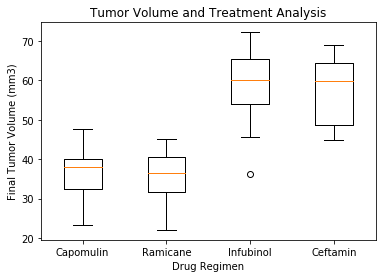

In [13]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest

plot_data = [ctumors, rtumors, itumors, cftumors]

fig1, ax1 = plt.subplots()
ax1.set_title('Tumor Volume and Treatment Analysis')
ax1.set_ylabel('Final Tumor Volume (mm3)')
ax1.set_xlabel('Drug Regimen')
ax1.boxplot(plot_data, labels=["Capomulin","Ramicane","Infubinol","Ceftamin"])

plt.savefig('boxplot')
plt.show()

## Line and Scatter Plots

In [14]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
lineplot_df = capo_df.loc[capo_df["Mouse ID"] == "g316",:]
lineplot_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
351,g316,Capomulin,Female,22,22,0,45.000000,0
352,g316,Capomulin,Female,22,22,5,44.022752,0
353,g316,Capomulin,Female,22,22,10,44.502042,0
354,g316,Capomulin,Female,22,22,15,45.216743,0
355,g316,Capomulin,Female,22,22,20,45.933322,1
356,g316,Capomulin,Female,22,22,25,46.809225,1
357,g316,Capomulin,Female,22,22,30,44.221480,2
358,g316,Capomulin,Female,22,22,35,44.702833,2
359,g316,Capomulin,Female,22,22,40,45.565821,2
360,g316,Capomulin,Female,22,22,45,40.159220,2


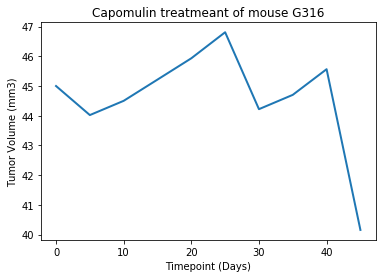

In [15]:
x_axis = lineplot_df["Timepoint"]
tumorvol = lineplot_df["Tumor Volume (mm3)"]

plt.title("Capomulin treatmeant of mouse G316")
plt.plot(x_axis, tumorvol,linewidth=2, markersize=12)
plt.xlabel('Timepoint (Days)')
plt.ylabel('Tumor Volume (mm3)')
plt.savefig('linechart')
plt.show()

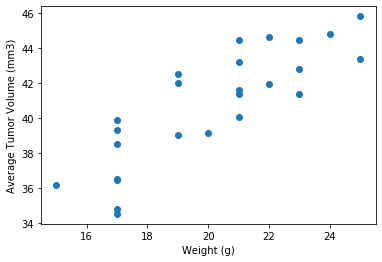

In [16]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen
capavvol = capo_df.groupby(['Mouse ID']).mean()
plt.scatter(capavvol['Weight (g)'],capavvol['Tumor Volume (mm3)'])
plt.xlabel('Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')

plt.savefig('scatterplot')
plt.show()


## Correlation and Regression

In [17]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

corrcoe=round(st.pearsonr(capavvol['Weight (g)'],capavvol['Tumor Volume (mm3)'])[0],2)
print(f"The correlation between mouse weight and average tumor volume is {corrcoe}")
print(f" ")

linregmodel=st.linregress(capavvol['Weight (g)'],capavvol['Tumor Volume (mm3)'])
linregmodel

The correlation between mouse weight and average tumor volume is 0.84
 


LinregressResult(slope=0.9544396890241045, intercept=21.552160532685015, rvalue=0.8419363424694718, pvalue=1.3225722434712642e-07, stderr=0.1275435903320134)

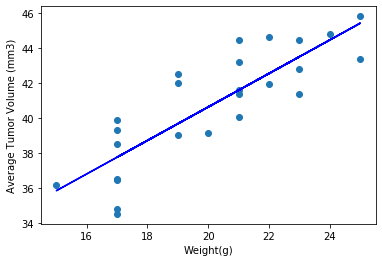

In [18]:
plot_slope = 0.9544396890241045
plot_intercept = 21.552160532685015
y_values = capavvol['Weight (g)'] * plot_slope + plot_intercept
plt.scatter(capavvol['Weight (g)'],capavvol['Tumor Volume (mm3)'])
plt.plot(capavvol['Weight (g)'],y_values,color="blue")
plt.xlabel('Weight(g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig('linearregression')
plt.show()